## The problem and data

##### Useful link - https://arxiv.org/pdf/1308.5499.pdf

##### The level of clothing a person is wearing at office is one of the key factors influencing their level of comfort. This assignment aims to model clothing insulation based on:
1. Indoor operating temperature and outdoor temperature (clothingSum.csv).
2. Indoor operating temperature, outdoor temperature and subject ID (clothingSum.csv).
3. Indoor operating temperature, outdoor temperature, subject ID and observation number (clothingFull.csv).

## Problem 1: General linear model

##### Reading the data

In [1]:
#setwd("~/Desktop/DTU/Advanced\ Dataanalysis\ and\ Statistical\ Modelling/Assignments")
HE <- read.table("clothingSum.csv", sep=",", header=TRUE, as.is=TRUE)

#### Define all needed libraries

In [2]:
library(ggplot2); suppressWarnings(suppressMessages(library("ggplot2")))
library(MASS); suppressWarnings(suppressMessages(library("MASS")))
library(dplyr); suppressWarnings(suppressMessages(library("dplyr")))
library(corrplot); suppressWarnings(suppressMessages(library("corrplot")))
library(mgcv); suppressWarnings(suppressMessages(library("mgcv")))
library(lmerTest); suppressWarnings(suppressMessages(library("lmerTest")))
library(repr); suppressWarnings(suppressMessages(library("lmerTest")))
library(car); suppressWarnings(suppressMessages(library("car")))


Attaching package: 'dplyr'

The following object is masked from 'package:MASS':

    select

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'corrplot' was built under R version 3.6.2"corrplot 0.84 loaded
Loading required package: nlme

Attaching package: 'nlme'

The following object is masked from 'package:dplyr':

    collapse

This is mgcv 1.8-31. For overview type 'help("mgcv-package")'.
Warning message:
"package 'lmerTest' was built under R version 3.6.3"Loading required package: lme4
Warning message:
"package 'lme4' was built under R version 3.6.2"Loading required package: Matrix

Attaching package: 'lme4'

The following object is masked from 'package:nlme':

    lmList


Attaching package: 'lmerTest'

The following object is masked from 'package:lme4':

    lmer

The following object is masked from 'package:stats':

    step

Warning

#### Adjust the size of all plots to 5 x 5

In [4]:
options(repr.plot.width=5, repr.plot.height=5)

#### Summary of data

In [5]:
head(HE)

subjId,day,clo,tOut,tInOp,sex
11,1,0.71,20.48765,25.44297,female
17,1,0.65,16.55730,23.16285,female
19,1,0.87,14.54109,24.55617,female
29,1,0.56,20.21969,27.01763,female
35,1,0.34,25.25117,28.61374,male
43,1,0.79,25.22943,27.07381,female


In [6]:
str(HE)

'data.frame':	136 obs. of  6 variables:
 $ subjId: int  11 17 19 29 35 43 47 49 51 55 ...
 $ day   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ clo   : num  0.71 0.65 0.87 0.56 0.34 ...
 $ tOut  : num  20.5 16.6 14.5 20.2 25.3 ...
 $ tInOp : num  25.4 23.2 24.6 27 28.6 ...
 $ sex   : chr  "female" "female" "female" "female" ...


In [7]:
summary(HE)

     subjId           day             clo              tOut      
 Min.   : 11.0   Min.   :1.000   Min.   :0.2467   Min.   :11.93  
 1st Qu.: 59.0   1st Qu.:1.000   1st Qu.:0.4700   1st Qu.:18.57  
 Median : 99.0   Median :2.000   Median :0.5483   Median :21.01  
 Mean   :101.1   Mean   :1.978   Mean   :0.5511   Mean   :21.54  
 3rd Qu.:141.0   3rd Qu.:3.000   3rd Qu.:0.6412   3rd Qu.:24.25  
 Max.   :199.0   Max.   :4.000   Max.   :0.9600   Max.   :33.08  
     tInOp           sex           
 Min.   :23.11   Length:136        
 1st Qu.:26.01   Class :character  
 Median :26.94   Mode  :character  
 Mean   :26.82                     
 3rd Qu.:27.48                     
 Max.   :29.55                     

#### Exclude a subset of attributes

In [8]:
myvars <- names(HE) %in% c("sex", "subjId", "day")
HE_subset <- HE[!myvars]

### Correlation plots

[1] "clo"   "tOut"  "tInOp"

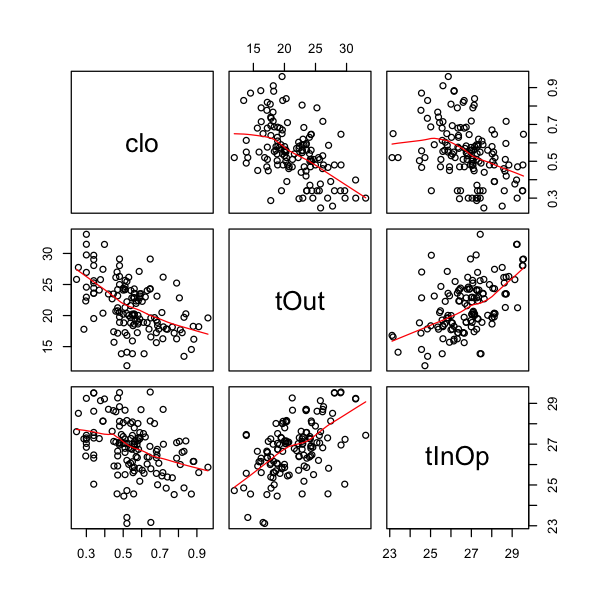

In [9]:
names(HE_subset)
attach(HE_subset)
pairs(HE_subset,panel=panel.smooth)

1. Level of clothing decreases if the outdoor temperature increases (i.e people tend to wear lighter cloths in warmer days).
2. Level of clothing decreases if the outdoor temperature increases. However, the effect is less significant that in the outdoor temperature case.
3. An increase in the outdoor temperature determines and increase in the indoor temperature.

#### Covariance matrix for the level of clothing, outdoor temperature and indoor temperature

In [10]:
cov(HE_subset)

,clo,tOut,tInOp
clo,0.02295290,-0.3220363,-0.07552588
tOut,-0.32203627,17.2760368,2.79966891
tInOp,-0.07552588,2.7996689,1.69431442


#### Correlation matrix for the level of clothing, outdoor temperature and indoor temperature

,clo,tOut,tInOp
clo,1.0000000,-0.5114038,-0.3829834
tOut,-0.5114038,1.0000000,0.5174729
tInOp,-0.3829834,0.5174729,1.0000000


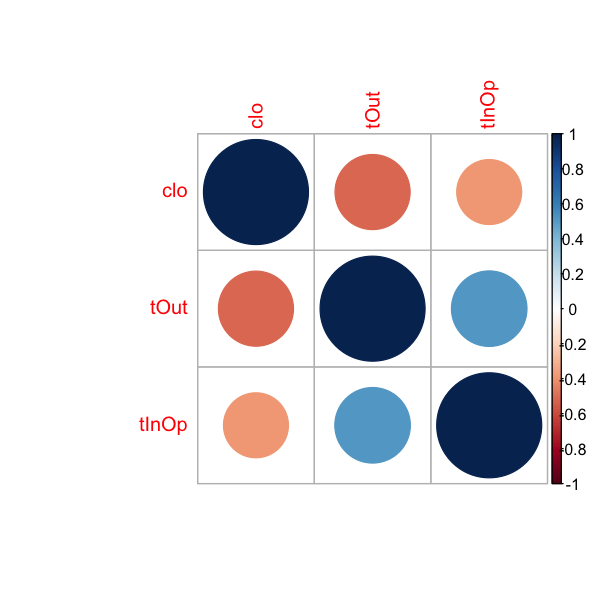

In [11]:
cor(HE_subset)
corrplot(cor(HE_subset))

### Gam plot to get an idea of relationships

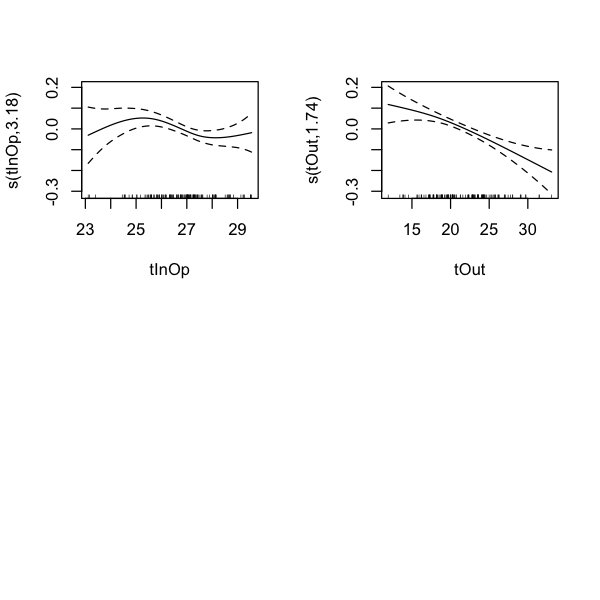

In [12]:
par(mfrow=c(2,2))
model<-gam(clo ~ s(tInOp) + s(tOut),data=HE_subset)
plot(model)

### Histogram for the temperature

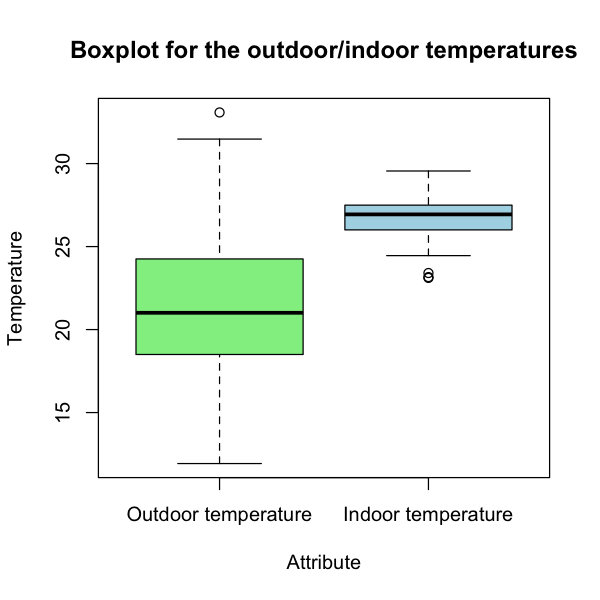

In [13]:
boxplot(HE$tOut, HE$tInOp,
        names=c("Outdoor temperature", "Indoor temperature"), 
        xlab="Attribute", ylab="Temperature", main="Boxplot for the outdoor/indoor temperatures", col=c("lightgreen","Lightblue"))

1. Outdoor temperature is more spread compared to the indoor temperature.
2. Outdoor temperature's mean is 21.54 with an IQR = Q3-Q1 = 24.25-18.57 = 5.68.
3. Indoor temperature's mean is 26.82 with an IQR = Q3-Q1 = 27.48-26.01 = 1.47.

### Simple linear regression for level of clothing (clo) based on outdoor temperature (tOut)

Warning message in predict.lm(fit_tOut, interval = "prediction"):
“predictions on current data refer to _future_ responses
”

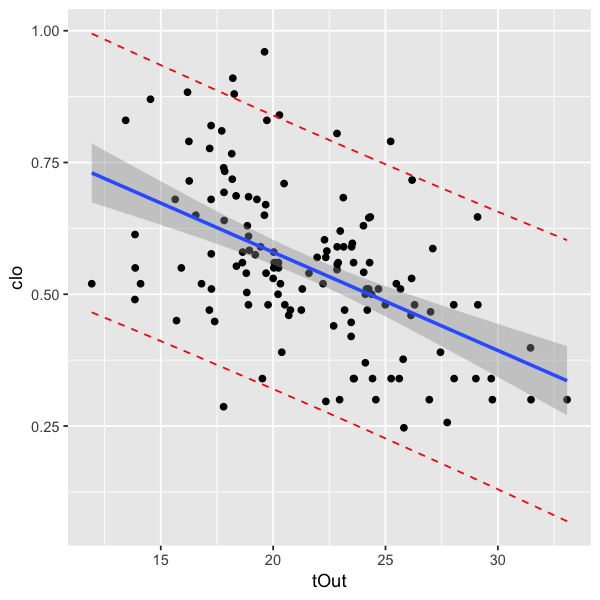

In [14]:
# 1. Add predictions 
fit_tOut <- lm(clo ~ tOut, data = HE)
pred.int <- predict(fit_tOut, interval = "prediction")
mydata <- cbind(HE, pred.int)

# 2. Regression line + confidence intervals
p <- ggplot(mydata, aes(tOut, clo)) + geom_point() + stat_smooth(method = lm)

# 3. Add prediction intervals
p + geom_line(aes(y = lwr), color = "red", linetype = "dashed") + geom_line(aes(y = upr), color = "red", linetype = "dashed")

### Simple linear regression for level of clothing (clo) based on indoor temperature (tInOp)

Warning message in predict.lm(fit_tInOp, interval = "prediction"):
“predictions on current data refer to _future_ responses
”

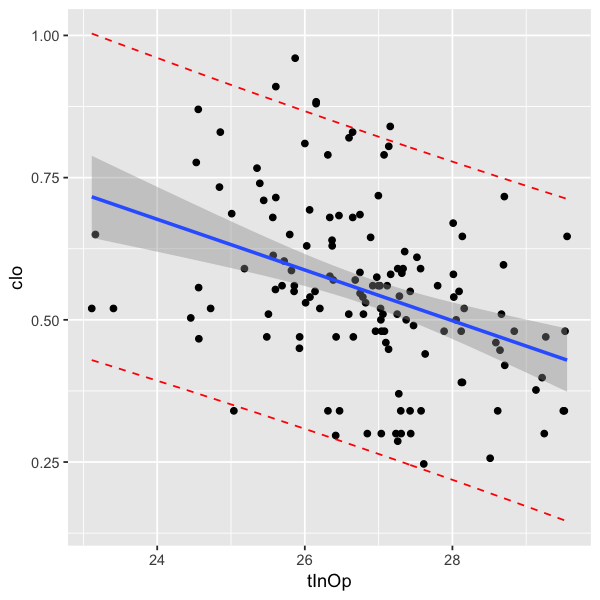

In [15]:
fit_tInOp <- lm(clo ~ tInOp, data = HE)
pred.int <- predict(fit_tInOp, interval = "prediction")
mydata <- cbind(HE, pred.int)
p <- ggplot(mydata, aes(tInOp, clo)) + geom_point() + stat_smooth(method = lm)
p + geom_line(aes(y = lwr), color = "red", linetype = "dashed") + geom_line(aes(y = upr), color = "red", linetype = "dashed")

Considering both sexes for level of clothing based on outdoor/indoor temperatures:
1. The level of clothing decreases when the outdoor / indoor temperature increases.
2. A few datapoints fall witin the confidence interval of the simple regression line.
3. Our dataset has a few outliers that do not meet even the prediction interval of the simple regression line.

### Fit general linear model to the data (i.e find the best model by incremental reduction)

#### Initiate the model with some possibly significant variables


Call:
lm(formula = clo ~ sex * tOut * tInOp + I((tInOp - mean(I(tInOp)))^2) + 
    I((tOut - mean(I(tOut)))^2), data = HE)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32526 -0.05233  0.00484  0.04728  0.30105 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)   
(Intercept)                    6.7973872  2.0783109   3.271  0.00138 **
sexmale                       -5.1269781  2.0533585  -2.497  0.01382 * 
tOut                          -0.2422223  0.0968907  -2.500  0.01371 * 
tInOp                         -0.2177495  0.0773724  -2.814  0.00567 **
I((tInOp - mean(I(tInOp)))^2) -0.0077002  0.0063222  -1.218  0.22551   
I((tOut - mean(I(tOut)))^2)   -0.0014177  0.0005865  -2.417  0.01707 * 
sexmale:tOut                   0.2098350  0.0960544   2.185  0.03077 * 
sexmale:tInOp                  0.1822961  0.0774553   2.354  0.02014 * 
tOut:tInOp                     0.0084150  0.0035811   2.350  0.02034 * 
sexmale:tOut:tInOp            -0.0075

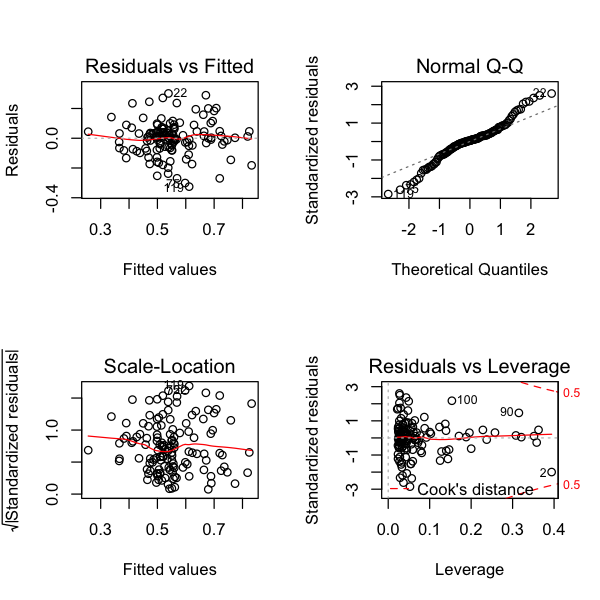

In [16]:
model_1<-lm(clo ~ sex*tOut*tInOp
                + I((tInOp - mean(I(tInOp)))^2) + I((tOut - mean(I(tOut)))^2), 
           data = HE)
summary(model_1)

par(mfrow=c(2,2))
plot(model_1)

1. Most of the variables show significant effect on the level of clothing.
2. The most significant appears to be the indoor temperature (i.e tInOp), the sex (i.e our example "male") and the normalized outdoor temperature (i.e I((tOut - mean(I(tOut)))^2)).
3. The least significant effect on level of clothing is shown by the normalized indoor temperature (i.e I((tInOp - mean(I(tInOp)))^2)).

#### To reduce the significance of sparse datapoints, we test the model on the logarithmic scale


Call:
lm(formula = log(clo) ~ sex * tOut * tInOp + I((tInOp - mean(I(tInOp)))^2) + 
    I((tOut - mean(I(tOut)))^2), data = HE)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72531 -0.09690  0.03082  0.10849  0.48764 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)   
(Intercept)                    9.920277   4.074593   2.435  0.01631 * 
sexmale                       -9.140789   4.025673  -2.271  0.02487 * 
tOut                          -0.417332   0.189957  -2.197  0.02985 * 
tInOp                         -0.363729   0.151691  -2.398  0.01796 * 
I((tInOp - mean(I(tInOp)))^2) -0.010186   0.012395  -0.822  0.41276   
I((tOut - mean(I(tOut)))^2)   -0.003079   0.001150  -2.678  0.00839 **
sexmale:tOut                   0.391079   0.188318   2.077  0.03986 * 
sexmale:tInOp                  0.326656   0.151853   2.151  0.03337 * 
tOut:tInOp                     0.014311   0.007021   2.038  0.04360 * 
sexmale:tOut:tInOp            -0.014065   

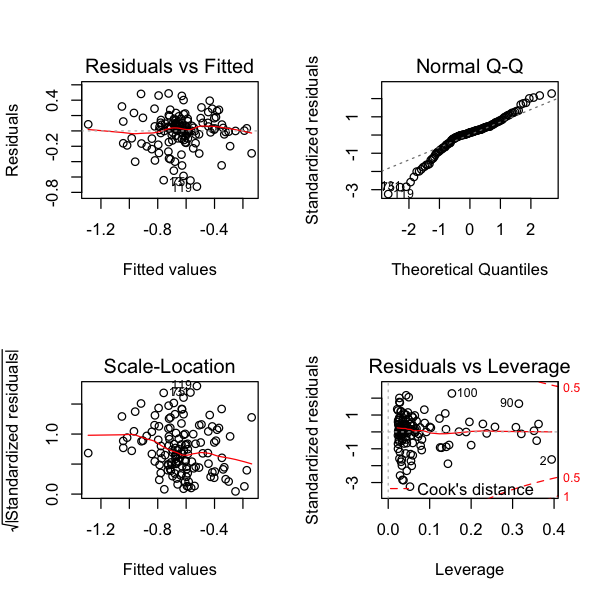

In [17]:
model_2<-lm(log(clo) ~ sex*tOut*tInOp
                + I((tInOp - mean(I(tInOp)))^2) + I((tOut - mean(I(tOut)))^2), 
           data = HE)
summary(model_2)

par(mfrow=c(2,2))
plot(model_2)

1. Even less significance is seen on most of the variables.
2. A larger significance compared to the linear model is seen from the normalized ourdoor temperature on the level of clothing (i.e I((tOut - mean(I(tOut)))^2))

#### Continue with linear model by reducing incrementally the least significant variables form the model

View which attribute is recommended to be dropped (i.e based on the p-value)

In [18]:
drop1(model_1, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,1.731743,-573.4396,NA,NA
I((tInOp - mean(I(tInOp)))^2),1,0.02038835,1.752131,-573.8478,1.483437,0.22551338
I((tOut - mean(I(tOut)))^2),1,0.08031329,1.812056,-569.2742,5.843520,0.01706642
sex:tOut:tInOp,1,0.06091153,1.792654,-570.7382,4.431866,0.03725964


In [19]:
model_1a <- update(model_1,~. -I((tInOp - mean(I(tInOp)))^2))
drop1(model_1a, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,1.752131,-573.8478,NA,NA
I((tOut - mean(I(tOut)))^2),1,0.07069909,1.822830,-570.4680,5.124493,0.02528690
sex:tOut:tInOp,1,0.05134844,1.803480,-571.9194,3.721897,0.05593395


In [20]:
model_1b <- update(model_1a,~. -sex:tOut:tInOp)
drop1(model_1b, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,1.803480,-571.9194,NA,NA
I((tOut - mean(I(tOut)))^2),1,0.04377061,1.847250,-570.6581,3.1065717,0.08036376
sex:tOut,1,0.01709184,1.820571,-572.6366,1.2130748,0.27279082
sex:tInOp,1,0.03475866,1.838238,-571.3232,2.4669583,0.11873145
tOut:tInOp,1,0.01247050,1.815950,-572.9823,0.8850803,0.34858607


In [21]:
model_1c <- update(model_1b,~. -tOut:tInOp)
drop1(model_1c, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,1.815950,-572.9823,NA,NA
I((tOut - mean(I(tOut)))^2),1,0.03135374,1.847304,-572.6542,2.2272816,0.1380338
sex:tOut,1,0.01305318,1.829003,-574.0082,0.9272613,0.3373772
sex:tInOp,1,0.03702016,1.852970,-572.2376,2.6298083,0.1073160


In [22]:
model_1d <- update(model_1c,~. -sex:tOut)
drop1(model_1d, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,1.829003,-574.0082,NA,NA
tOut,1,0.19038310,2.019386,-562.5411,13.531853,0.0003422157
I((tOut - mean(I(tOut)))^2),1,0.04718046,1.876184,-572.5445,3.353444,0.0693542115
sex:tInOp,1,0.08507754,1.914081,-569.8248,6.047054,0.0152442025



Call:
lm(formula = clo ~ sex + tOut + tInOp + sex:tInOp, data = HE)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33392 -0.05325  0.00402  0.05806  0.31712 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.132395   0.316897   6.729 4.83e-10 ***
sexmale       -1.283448   0.445072  -2.884 0.004596 ** 
tOut          -0.012204   0.003024  -4.036 9.19e-05 ***
tInOp         -0.047494   0.012912  -3.678 0.000342 ***
sexmale:tInOp  0.044600   0.016563   2.693 0.008013 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1197 on 131 degrees of freedom
Multiple R-squared:  0.3945,	Adjusted R-squared:  0.376 
F-statistic: 21.34 on 4 and 131 DF,  p-value: 1.434e-13


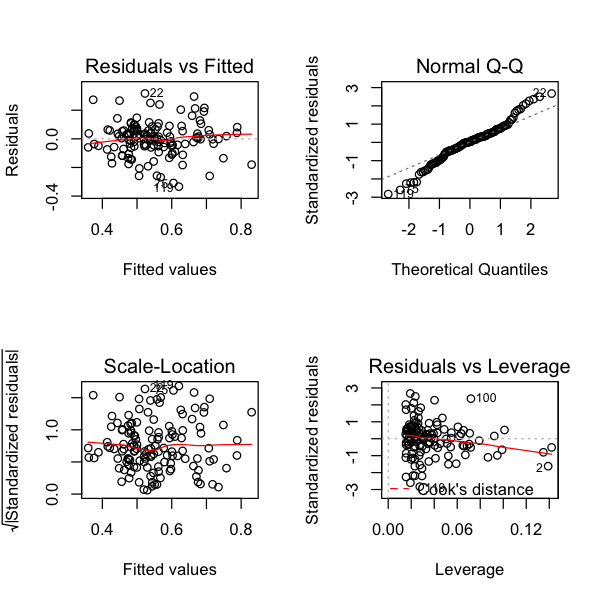

In [23]:
model_1e <- update(model_1d,~. -I((tOut - mean(I(tOut)))^2))
summary(model_1e)

par(mfrow=c(2,2))
plot(model_1e)

Once a very significant effect is seen from all the variables in the final model (i.e model_1e), it is fair to conclude that the model reflects the dependancy of level of clothing (i.e clo) as a factor of over variables quite well.

### Weighted analysis for sexes

#### Visualization for the temperature spread across sexes

In [24]:
fem <- subset(HE, (sex == 'female'));
male <- subset(HE, (sex == 'male'));

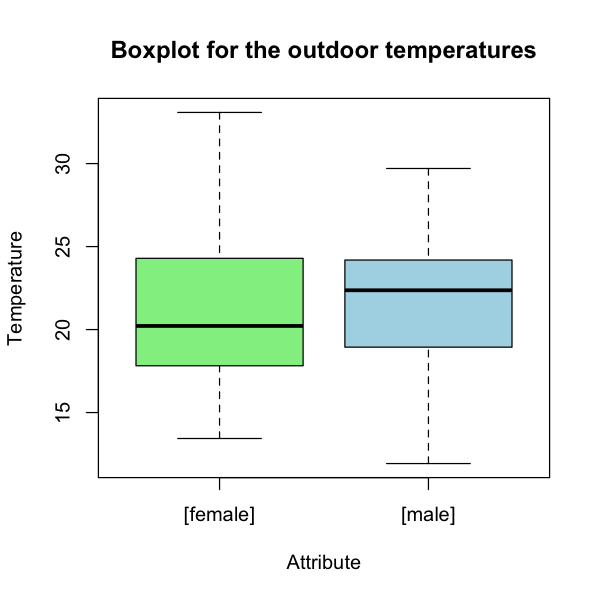

In [25]:
boxplot(fem$tOut, male$tOut,
        names=c("[female]", "[male]"), 
        xlab="Attribute", ylab="Temperature", main="Boxplot for the outdoor temperatures", col=c("lightgreen","Lightblue"))

1. Data points for females are spread out over temperature more than the ones for males.
2. Mean outdoor temperature for females is lower than the one more males.
3. Minimum temperature is recorded for males, while maximum - for females.

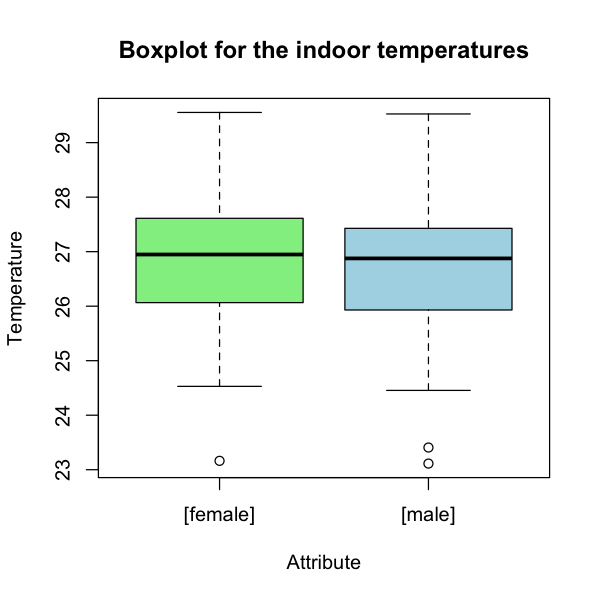

In [26]:
boxplot(fem$tInOp, male$tInOp,
        names=c("[female]", "[male]"), 
        xlab="Attribute", ylab="Temperature", main="Boxplot for the indoor temperatures", col=c("lightgreen","Lightblue"))

1. Indoor temperature is more or less evenly distributed between sexes.
2. Females register one outlier, while males have two outliers (i.e data point out of the 1.5*IQR).
3. The mean of the indoor temperature is slightly bigger than the one for males.

### Histogram for the level of clothing

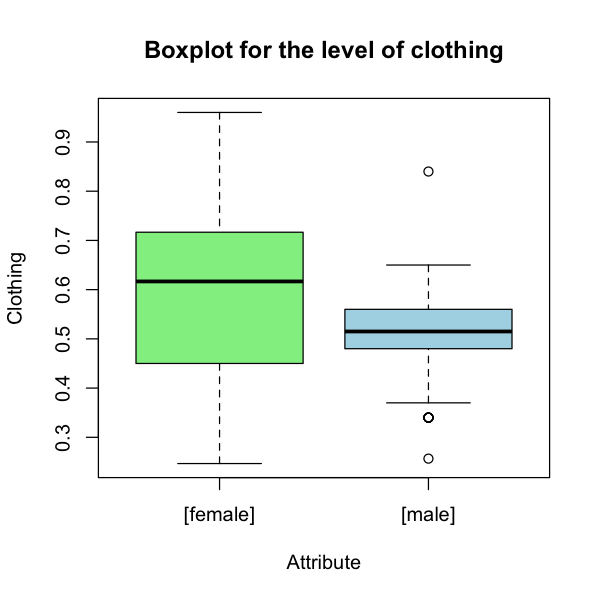

In [27]:
fem <- subset(HE, (sex == 'female'));
male <- subset(HE, (sex == 'male'));

boxplot(fem$clo, male$clo,
        names=c("[female]", "[male]"), 
        xlab="Attribute", ylab="Clothing", main="Boxplot for the level of clothing", col=c("lightgreen","Lightblue"))

1. The level of clothing for females is significantly more spread out than the one for males.
2. The mean level of clothing is higher for females.
3. There are no outliers (i.e out of the 1.5*IQR data points) for females, while we have a few for males.

### Find optimal variance matrix based on the variance of samples within the sex groups

In [3]:
# Sort data by sex
data_f = subset(HE, sex=="female")
data_m = subset(HE, sex=="male")
data = rbind(data_m, data_f)

In [42]:
lm_model1 = lm(clo ~ sex + tOut + tInOp + sex:tInOp, data = data)
summary(lm_model1)


Call:
lm(formula = clo ~ sex + tOut + tInOp + sex:tInOp, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33392 -0.05325  0.00402  0.05806  0.31712 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.132395   0.316897   6.729 4.83e-10 ***
sexmale       -1.283448   0.445072  -2.884 0.004596 ** 
tOut          -0.012204   0.003024  -4.036 9.19e-05 ***
tInOp         -0.047494   0.012912  -3.678 0.000342 ***
sexmale:tInOp  0.044600   0.016563   2.693 0.008013 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1197 on 131 degrees of freedom
Multiple R-squared:  0.3945,	Adjusted R-squared:  0.376 
F-statistic: 21.34 on 4 and 131 DF,  p-value: 1.434e-13


#### Create weights for male and female  

#### Check the difference in variance for males and females

In [30]:
variance <- tapply(residuals(lm_model1), HE$sex, var)
variance

female        male 
0.020394174 0.007215165

The female variance is about 3 times higher than the male variance.

#### Concept check with the indetity matrix as the weights (i.e should resamble the unweighted lm output)

In [31]:
# Add weights to see how the residuls of the model responds.
wts_m = matrix(1,nrow=dim(data_m[1]))
wts_f = matrix(1,nrow=dim(data_f)[1])
wts = c(wts_m, wts_f)

In [43]:
lm_model = lm(clo ~ sex + tOut + tInOp + sex:tInOp, data = data, weights = wts)
summary(lm_model)


Call:
lm(formula = clo ~ sex + tOut + tInOp + sex:tInOp, data = data, 
    weights = wts)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-0.18953 -0.04274  0.00669  0.04897  0.32081 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.217593   0.369088   6.008 1.74e-08 ***
sexmale       -1.365934   0.430221  -3.175 0.001868 ** 
tOut          -0.010177   0.002568  -3.962 0.000121 ***
tInOp         -0.052268   0.014424  -3.624 0.000414 ***
sexmale:tInOp  0.047625   0.015985   2.979 0.003442 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08484 on 131 degrees of freedom
Multiple R-squared:  0.3492,	Adjusted R-squared:  0.3293 
F-statistic: 17.57 on 4 and 131 DF,  p-value: 1.444e-11


#### Remark:

Setting up the weights for both sexes - male and female equal to 1, we reach the usual lm output (i.e having the itentity matrix as the covariance matrix).

#### Fine-tunning the weights for females (i.e seen in relation to the one for males)

Find optimal weight that maximizes the log likelihood of the model. We do this by simply runing a for loop through various weights and plotting the outputs to find which weight gives the maximum.

 #### Different weights to be tested

In [33]:
wts_ = seq(0.1,1,0.01)

In [34]:
llh = c()
for(i in wts_){
  wts_m = matrix(1,ncol=dim(data_m[1]))
  wts_f = matrix(i,ncol=dim(data_f)[1]) # Put the weights on female
  wts = c(wts_m, wts_f)
  glm_model = glm(clo ~ sex + tOut + tInOp + sex:tInOp, data=data, weights=wts)
  llh_ = logLik(glm_model)
  llh = c(llh, llh_)
}

[1] 107.3211

[1] 25

[1] 0.34

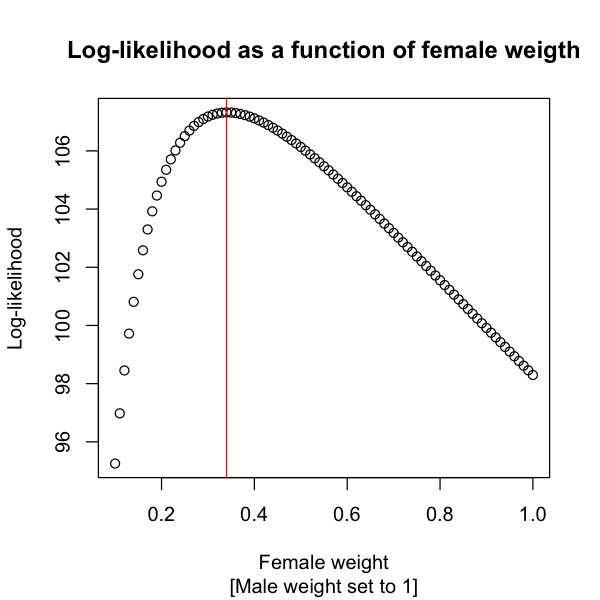

In [46]:
max(llh)
which.max(llh)
wts_[which.max(llh)]
plot(wts_, llh, xlab = "Female weight", ylab = "Log-likelihood", main = "Log-likelihood as a function of female weigth", sub = "[Male weight set to 1]")
abline(v = wts_[which.max(llh)], col="red")

In [47]:
wts_m = matrix(1,nrow=dim(data_m[1]))
wts_f = matrix(wts_[which.max(llh)],nrow=dim(data_f)[1])
wts = c(wts_m, wts_f)

In [48]:
glm_model2 = glm(clo ~ sex + tOut + tInOp + sex:tInOp, data = data, weights = wts)
summary(glm_model2)


Call:
glm(formula = clo ~ sex + tOut + tInOp + sex:tInOp, data = data, 
    weights = wts)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.18953  -0.04274   0.00669   0.04897   0.32081  

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.217593   0.369088   6.008 1.74e-08 ***
sexmale       -1.365934   0.430221  -3.175 0.001868 ** 
tOut          -0.010177   0.002568  -3.962 0.000121 ***
tInOp         -0.052268   0.014424  -3.624 0.000414 ***
sexmale:tInOp  0.047625   0.015985   2.979 0.003442 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.007198078)

    Null deviance: 1.44886  on 135  degrees of freedom
Residual deviance: 0.94295  on 131  degrees of freedom
AIC: -202.64

Number of Fisher Scoring iterations: 2


### Visualization of the model with confidence and prediction intervals

### 1. clo ~ tOut

#### Weighting based on sexes

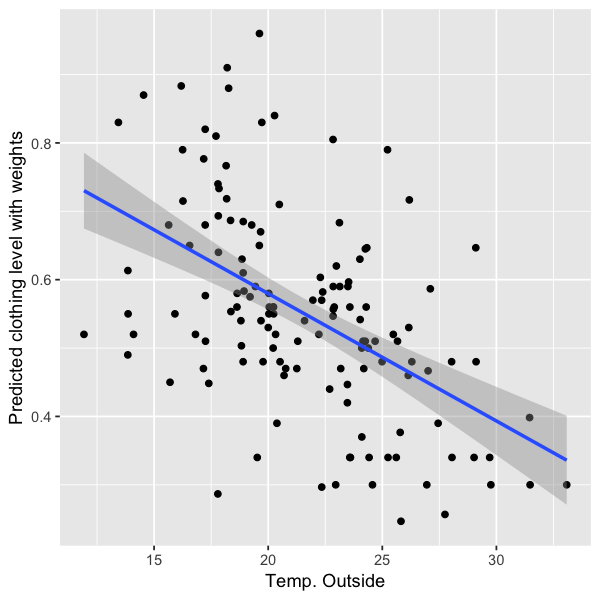

In [54]:
glm_pred2 = predict(glm_model2, interval = "prediction")
data2.2= data.frame(data, clo = glm_pred2)
p_model2 = ggplot(data2.2, aes(tOut, clo)) + geom_point() + stat_smooth(method = glm)+ labs(y="Predicted clothing level with weights", x = "Temp. Outside")
p_model2

#### Plot without weighting

Warning message in predict.lm(fit_tOut1, interval = "prediction"):
“predictions on current data refer to _future_ responses
”

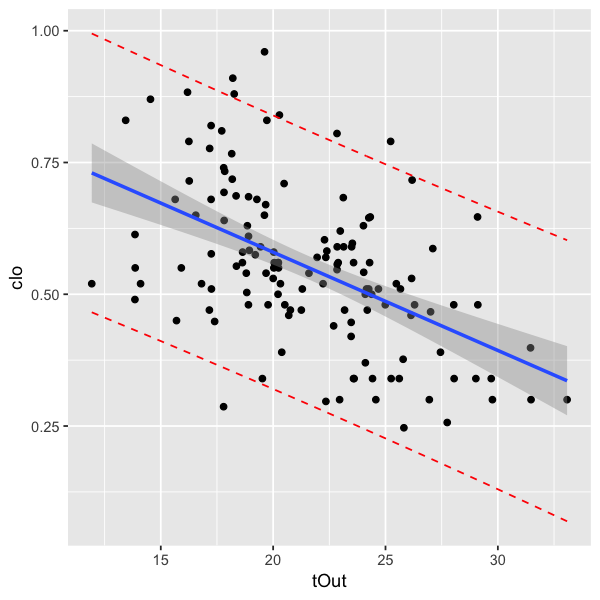

In [69]:
fit_tOut1 <- lm(clo ~ tOut, data = data)
pred_tOut1 <- predict(fit_tOut1, interval = "prediction")
mydata_tOut1 <- cbind(data, pred_tOut1)
p_tOut1 <- ggplot(mydata_tOut1, aes(tOut, clo)) + geom_point() + stat_smooth(method = lm)
p_tOut1 + geom_line(aes(y = lwr), color = "red", linetype = "dashed") + geom_line(aes(y = upr), color = "red", linetype = "dashed")

### 2. clo ~ tInOp

#### Males and females

Warning message in predict.lm(fit_tInOp1, interval = "prediction"):
“predictions on current data refer to _future_ responses
”

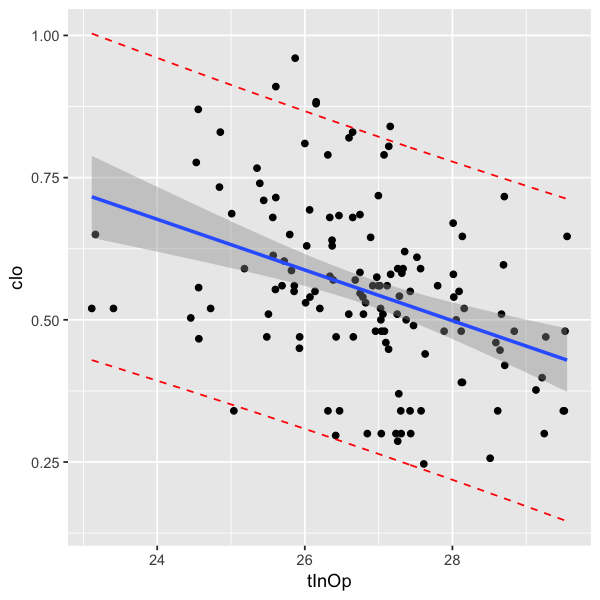

In [73]:
fit_tInOp1 <- lm(clo ~ tInOp, data = data)
pred_tInOp1 <- predict(fit_tInOp1, interval = "prediction")
mydata_tInOp1 <- cbind(data, pred_tInOp1)
p_tInOp1 <- ggplot(mydata_tInOp1, aes(tInOp, clo)) + geom_point() + stat_smooth(method = lm)
p_tInOp1 + geom_line(aes(y = lwr), color = "red", linetype = "dashed") + geom_line(aes(y = upr), color = "red", linetype = "dashed")

#### Female

Warning message in predict.lm(fit_tInOp1, interval = "prediction"):
“predictions on current data refer to _future_ responses
”

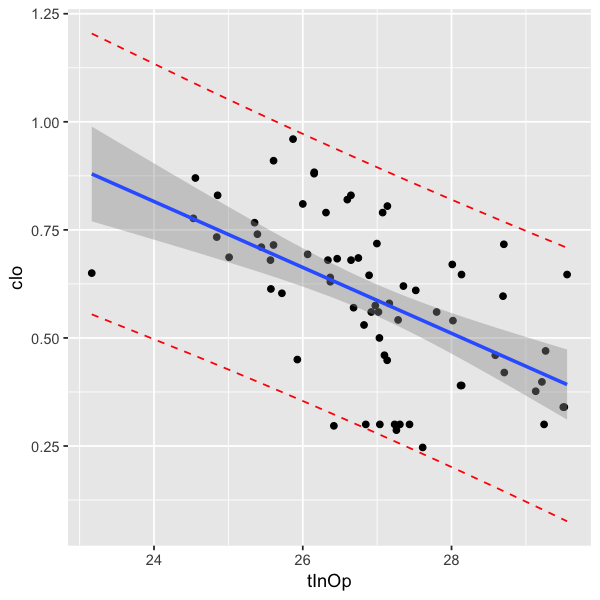

In [74]:
fit_tInOp1 <- lm(clo ~ tInOp, data = data_f)
pred_tInOp1 <- predict(fit_tInOp1, interval = "prediction")
mydata_tInOp1 <- cbind(data_f, pred_tInOp1)
p_tInOp1 <- ggplot(mydata_tInOp1, aes(tInOp, clo)) + geom_point() + stat_smooth(method = lm)
p_tInOp1 + geom_line(aes(y = lwr), color = "red", linetype = "dashed") + geom_line(aes(y = upr), color = "red", linetype = "dashed")

#### Male

Warning message in predict.lm(fit_tInOp2, interval = "prediction"):
“predictions on current data refer to _future_ responses
”

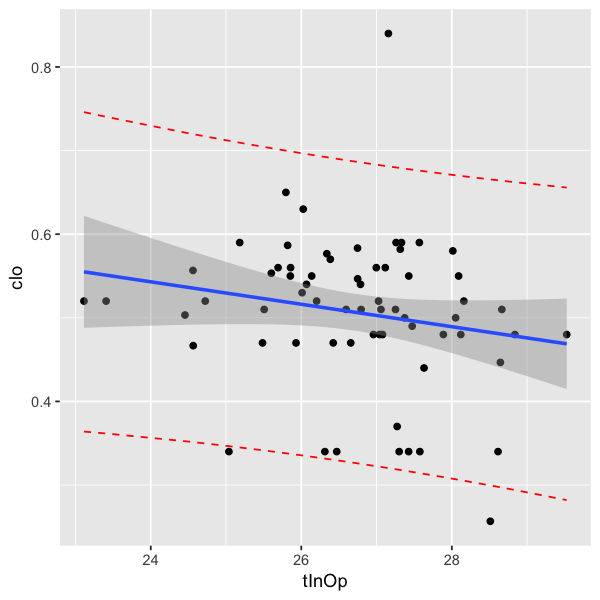

In [75]:
fit_tInOp2 <- lm(clo ~ tInOp, data = data_m)
pred_tInOp2 <- predict(fit_tInOp2, interval = "prediction")
mydata_tInOp2 <- cbind(data_m, pred_tInOp2)
p_tInOp2 <- ggplot(mydata_tInOp2, aes(tInOp, clo)) + geom_point() + stat_smooth(method = lm)
p_tInOp2 + geom_line(aes(y = lwr), color = "red", linetype = "dashed") + geom_line(aes(y = upr), color = "red", linetype = "dashed")

### Check based on residuals if subjectId can be ignored

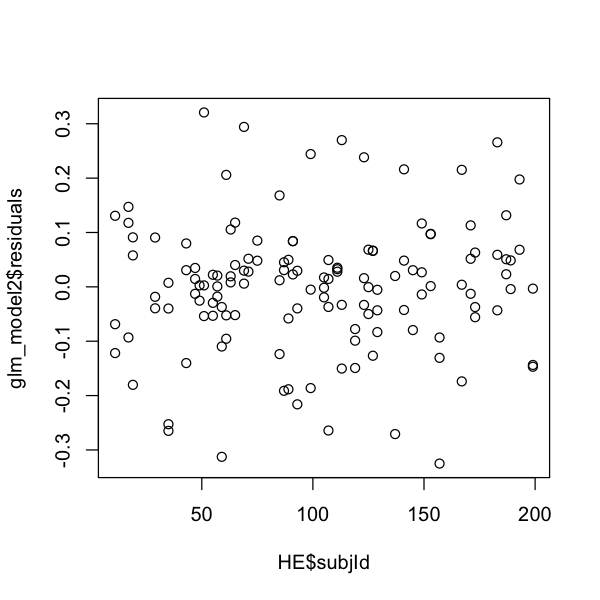

In [76]:
plot(HE$subjId, glm_model2$residuals)

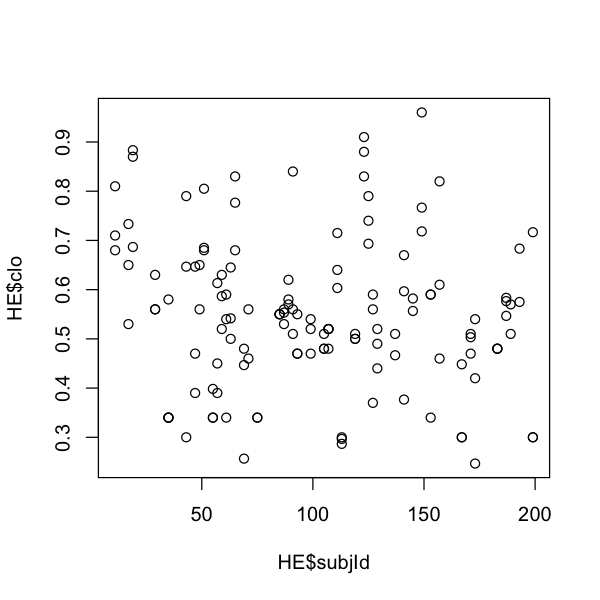

In [77]:
plot(HE$subjId,HE$clo)

By plotting the residuals based on the subject ID, we may see that there is a high variation between subject IDs. Further on, the level of clothing varies a lot based on the subject ID. Thus, it is important to include it as well in the model.

### Problem 2: Including subject Id

On each subject ID the outdoor temperature and level of clothing play a significant role (e.g even though subject ID 11 or 51 is defined by having a high level of clothing, that number is proportional to the outdoor temperature than is 19.15 C; on the other hand, due to the high outdoor temperature, the subject ID 55 has a low level of clothing).

In [78]:
cbind(with(HE, aggregate(tOut ~ subjId, FUN = "mean")),with(HE, aggregate(clo ~ subjId, FUN = "mean")))

subjId,tOut,subjId,clo
11,19.15951,11,0.7333333
17,20.18804,17,0.6377778
19,16.36067,19,0.8133333
29,22.84365,29,0.5833333
35,21.74722,35,0.4000000
43,28.60078,43,0.5788889
47,24.34119,47,0.5022222
49,19.12215,49,0.6050000
51,19.66243,51,0.7233333
55,29.50992,55,0.3594444


In [81]:
model_3 <- lm(clo ~ sex*tOut*tInOp*subjId
                + I((tInOp - mean(I(tInOp)))^2) + I((tOut - mean(I(tOut)))^2), 
           data = HE)
summary(model_3)
drop1(model_3, test="F")


Call:
lm(formula = clo ~ sex * tOut * tInOp * subjId + I((tInOp - mean(I(tInOp)))^2) + 
    I((tOut - mean(I(tOut)))^2), data = HE)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.306105 -0.056415 -0.002059  0.046318  0.308334 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)   
(Intercept)                    0.0647391  3.0652315   0.021  0.98319   
sexmale                        0.6925263  6.4393157   0.108  0.91454   
tOut                           0.0906539  0.1456882   0.622  0.53498   
tInOp                          0.0229351  0.1139290   0.201  0.84080   
subjId                         0.1029498  0.0365486   2.817  0.00569 **
I((tInOp - mean(I(tInOp)))^2) -0.0041583  0.0066229  -0.628  0.53130   
I((tOut - mean(I(tOut)))^2)   -0.0013048  0.0006093  -2.141  0.03430 * 
sexmale:tOut                  -0.0242128  0.2821324  -0.086  0.93175   
sexmale:tInOp                 -0.0176151  0.2411087  -0.073  0.94188   
tOut:tInOp        

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,1.504765,-576.5465,NA,NA
I((tInOp - mean(I(tInOp)))^2),1,0.005027289,1.509792,-578.0929,0.3942277,0.53129874
I((tOut - mean(I(tOut)))^2),1,0.058478110,1.563243,-573.3613,4.5857104,0.03429599
sex:tOut:tInOp:subjId,1,0.030905418,1.535671,-575.7815,2.4235273,0.12220358


#### Perform the incremental model reduction

In [85]:
model_3a <- update(model_3,~. -I((tInOp - mean(I(tInOp)))^2))
drop1(model_3a, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,1.509792,-578.0929,NA,NA
I((tOut - mean(I(tOut)))^2),1,0.05513285,1.564925,-575.2151,4.345504,0.03924569
sex:tOut:tInOp:subjId,1,0.04206000,1.551852,-576.3560,3.315118,0.07115802


In [86]:
model_3b <- update(model_3a,~. -sex:tOut:tInOp:subjId)
drop1(model_3b, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,1.551852,-576.3560,NA,NA
I((tOut - mean(I(tOut)))^2),1,0.067898259,1.619751,-572.5320,5.2503647,0.023686278
sex:tOut:tInOp,1,0.117886005,1.669738,-568.3984,9.1157642,0.003096343
sex:tOut:subjId,1,0.031791106,1.583644,-575.5980,2.4583090,0.119537811
sex:tInOp:subjId,1,0.007728468,1.559581,-577.6803,0.5976188,0.441008105
tOut:tInOp:subjId,1,0.061967056,1.613819,-573.0310,4.7917229,0.030532555


In [87]:
model_3c <- update(model_3b,~. -sex:tInOp:subjId)
drop1(model_3c, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,1.559581,-577.6803,NA,NA
I((tOut - mean(I(tOut)))^2),1,0.06092532,1.620506,-574.4686,4.726888,0.031641139
sex:tOut:tInOp,1,0.12038070,1.679962,-569.5682,9.339730,0.002759638
sex:tOut:subjId,1,0.06031322,1.619894,-574.5200,4.679398,0.032492713
tOut:tInOp:subjId,1,0.08428350,1.643864,-572.5223,6.539131,0.011788475


In [88]:
model_3d <- update(model_3c,~. -sex:tOut:subjId)
drop1(model_3d, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,1.619894,-574.5200,NA,NA
I((tOut - mean(I(tOut)))^2),1,0.07145749,1.691352,-570.6493,5.381718,0.022010747
sex:subjId,1,0.05180866,1.671703,-572.2385,3.901895,0.050489426
sex:tOut:tInOp,1,0.10873714,1.728631,-567.6842,8.189382,0.004959928
tOut:tInOp:subjId,1,0.08288467,1.702779,-569.7335,6.242340,0.013803584


In [89]:
model_3e <- update(model_3d,~. -sex:subjId)
drop1(model_3e, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,1.671703,-572.2385,NA,NA
I((tOut - mean(I(tOut)))^2),1,0.07942397,1.751127,-567.9258,5.843831,0.017099006
sex:tOut:tInOp,1,0.10682157,1.778524,-565.8144,7.859683,0.005875717
tOut:tInOp:subjId,1,0.06880519,1.740508,-568.7530,5.062526,0.026225990


In [90]:
model_3f <- update(model_3e,~. -tOut:tInOp:subjId)
drop1(model_3f, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,1.740508,-568.7530,NA,NA
I((tOut - mean(I(tOut)))^2),1,0.058213167,1.798721,-566.2787,4.1473138,0.04383008
tOut:subjId,1,0.011125813,1.751634,-569.8864,0.7926426,0.37502636
tInOp:subjId,1,0.001565273,1.742073,-570.6307,0.1115156,0.73898924
sex:tOut:tInOp,1,0.043988926,1.784497,-567.3585,3.1339281,0.07913628


In [91]:
model_3g <- update(model_3f,~. -tInOp:subjId)
drop1(model_3g, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,1.742073,-570.6307,NA,NA
I((tOut - mean(I(tOut)))^2),1,0.060050432,1.802124,-568.0217,4.3088338,0.03996499
tOut:subjId,1,0.009770013,1.751843,-571.8701,0.7010334,0.40403461
sex:tOut:tInOp,1,0.044254638,1.786328,-569.2190,3.1754290,0.07718156


In [103]:
model_3h <- update(model_3g,~. -tOut:subjId)
drop1(model_3h, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,1.751843,-571.8701,NA,NA
subjId,1,0.0002879207,1.752131,-573.8478,0.02070848,0.88580585
I((tOut - mean(I(tOut)))^2),1,0.0708955302,1.822739,-568.4748,5.09910739,0.02565829
sex:tOut:tInOp,1,0.0496296221,1.801473,-570.0708,3.56957304,0.06114553


In [104]:
model_3i <- update(model_3h,~. -subjId)
drop1(model_3i, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,1.752131,-573.8478,NA,NA
I((tOut - mean(I(tOut)))^2),1,0.07069909,1.822830,-570.4680,5.124493,0.02528690
sex:tOut:tInOp,1,0.05134844,1.803480,-571.9194,3.721897,0.05593395


In [105]:
model_3j <- update(model_3i,~. -sex:tOut:tInOp)
drop1(model_3j, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,1.803480,-571.9194,NA,NA
I((tOut - mean(I(tOut)))^2),1,0.04377061,1.847250,-570.6581,3.1065717,0.08036376
sex:tOut,1,0.01709184,1.820571,-572.6366,1.2130748,0.27279082
sex:tInOp,1,0.03475866,1.838238,-571.3232,2.4669583,0.11873145
tOut:tInOp,1,0.01247050,1.815950,-572.9823,0.8850803,0.34858607


In [106]:
model_3k <- update(model_3j,~. -tOut:tInOp)
drop1(model_3k, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,1.815950,-572.9823,NA,NA
I((tOut - mean(I(tOut)))^2),1,0.03135374,1.847304,-572.6542,2.2272816,0.1380338
sex:tOut,1,0.01305318,1.829003,-574.0082,0.9272613,0.3373772
sex:tInOp,1,0.03702016,1.852970,-572.2376,2.6298083,0.1073160


In [107]:
model_3k1 <- update(model_3k,~. -sex:tOut)
drop1(model_3k1, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,1.829003,-574.0082,NA,NA
tOut,1,0.19038310,2.019386,-562.5411,13.531853,0.0003422157
I((tOut - mean(I(tOut)))^2),1,0.04718046,1.876184,-572.5445,3.353444,0.0693542115
sex:tInOp,1,0.08507754,1.914081,-569.8248,6.047054,0.0152442025


In [108]:
model_3k2 <- update(model_3k1,~. -I((tOut - mean(I(tOut)))^2))
drop1(model_3k2, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,1.876184,-572.5445,NA,NA
tOut,1,0.2332923,2.109476,-558.6053,16.289072,9.194695e-05
sex:tInOp,1,0.1038464,1.980030,-567.2178,7.250824,8.013277e-03



Call:
lm(formula = clo ~ sex + tOut + tInOp + sex:tInOp, data = HE)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33392 -0.05325  0.00402  0.05806  0.31712 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.132395   0.316897   6.729 4.83e-10 ***
sexmale       -1.283448   0.445072  -2.884 0.004596 ** 
tOut          -0.012204   0.003024  -4.036 9.19e-05 ***
tInOp         -0.047494   0.012912  -3.678 0.000342 ***
sexmale:tInOp  0.044600   0.016563   2.693 0.008013 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1197 on 131 degrees of freedom
Multiple R-squared:  0.3945,	Adjusted R-squared:  0.376 
F-statistic: 21.34 on 4 and 131 DF,  p-value: 1.434e-13


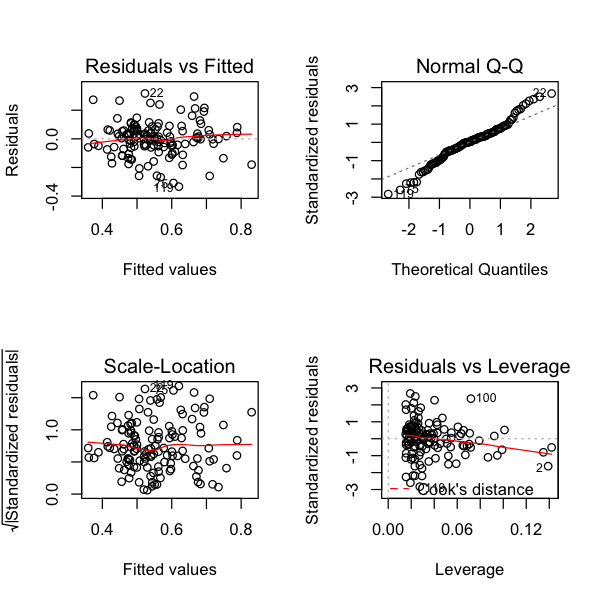

In [110]:
summary(model_3k2)
par(mfrow=c(2,2))
plot(model_3k2)

### Add subjectID in the model or use model comparison

In [36]:
rs_subj_all_ml = lmer(clo ~ sex + tOut + tInOp + sex:tInOp + (1 | subjId), REML = FALSE, data = data)

rs_subj_sex_ml = lmer(clo ~ 1 + tOut + tInOp + sex:tInOp + (1 | subjId), REML = FALSE, data = data)
anova(rs_subj_all_ml, rs_subj_sex_ml)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
rs_subj_sex_ml,6,-199.5329,-182.0570,105.7665,-211.5329,NA,NA,NA
rs_subj_all_ml,7,-203.8331,-183.4445,108.9165,-217.8331,6.300172,1,0.01207262


In [37]:
rs_subj_tOut_ml = lmer(clo ~ 1 + sex + tInOp + sex:tInOp + (1 | subjId), REML = FALSE, data = data)
anova(rs_subj_all_ml, rs_subj_tOut_ml)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
rs_subj_tOut_ml,6,-183.7325,-166.2565,97.86623,-195.7325,NA,NA,NA
rs_subj_all_ml,7,-203.8331,-183.4445,108.91654,-217.8331,22.10062,1,2.58726e-06


In [58]:
confint(rs_subj_tOut_ml)

Computing profile confidence intervals ...


,2.5 %,97.5 %
.sig01,0.04980971,0.10436091
.sigma,0.08643868,0.11636986
(Intercept),1.63982174,3.02575601
sexmale,-2.57710646,-0.64816117
tInOp,-0.09031816,-0.03893197
sexmale:tInOp,0.02075151,0.09258152


In [53]:
rs_subj_tInOp_ml = lmer(clo ~ 1 + sex + tOut + sex:tInOp + (1 | subjId), REML = FALSE, data = data)
anova(rs_subj_all_ml, rs_subj_tInOp_ml)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
rs_subj_all_ml,7,-203.8331,-183.4445,108.9165,-217.8331,NA,NA,NA
rs_subj_tInOp_ml,7,-203.8331,-183.4445,108.9165,-217.8331,0,0,1


In [54]:
rs_subj_sex_tInOp_ml = lmer(clo ~ 1 + sex + tOut + tInOp + (1 | subjId), REML = FALSE, data = data)
anova(rs_subj_all_ml, rs_subj_sex_tInOp_ml)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
rs_subj_sex_tInOp_ml,6,-200.3403,-182.8643,106.1701,-212.3403,NA,NA,NA
rs_subj_all_ml,7,-203.8331,-183.4445,108.9165,-217.8331,5.492834,1,0.01909456


NOTE: sex is not a high-order term in the model


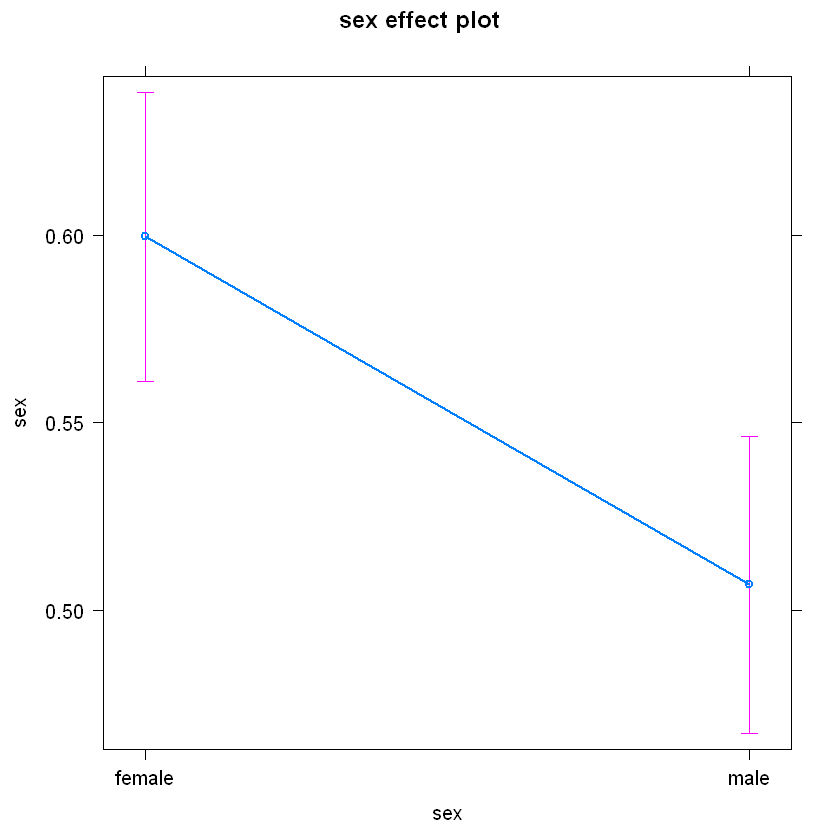

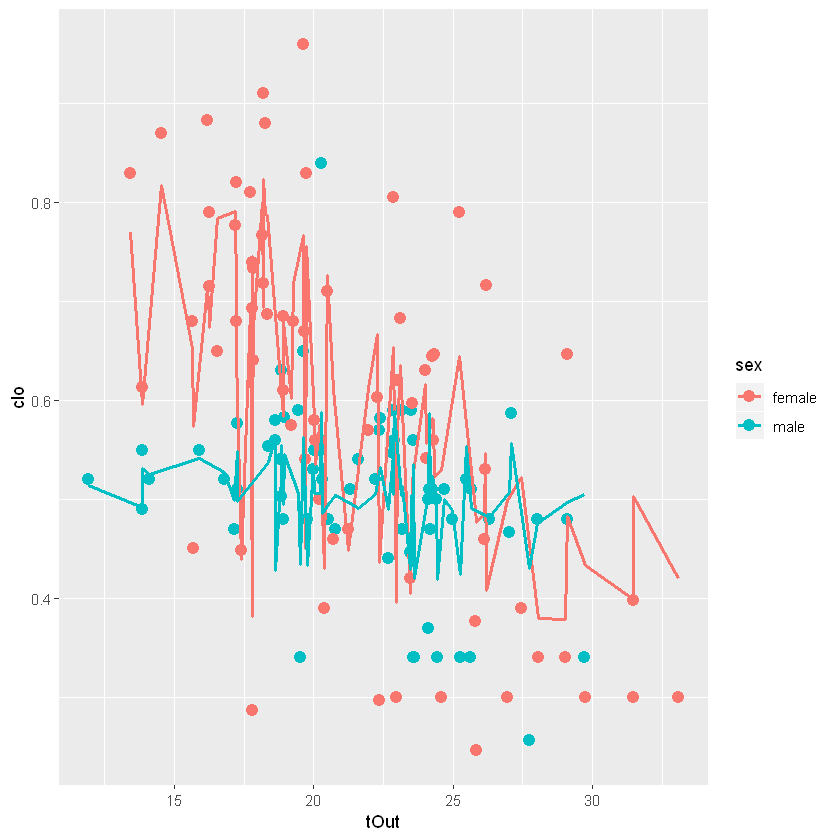

In [57]:
#library(effects)
p <- ggplot(data, aes(x = tOut, y = clo, colour = sex)) +
  geom_point(size=3) +
  geom_line(aes(y = predict(rs_subj_tOut_ml)),size=1) 
par(mfrow=c(2,2))
#confint(rs_subj_tOut_ml)
plot(effect(c("sex"), rs_subj_tOut_ml), ylab="sex")
plot(p)

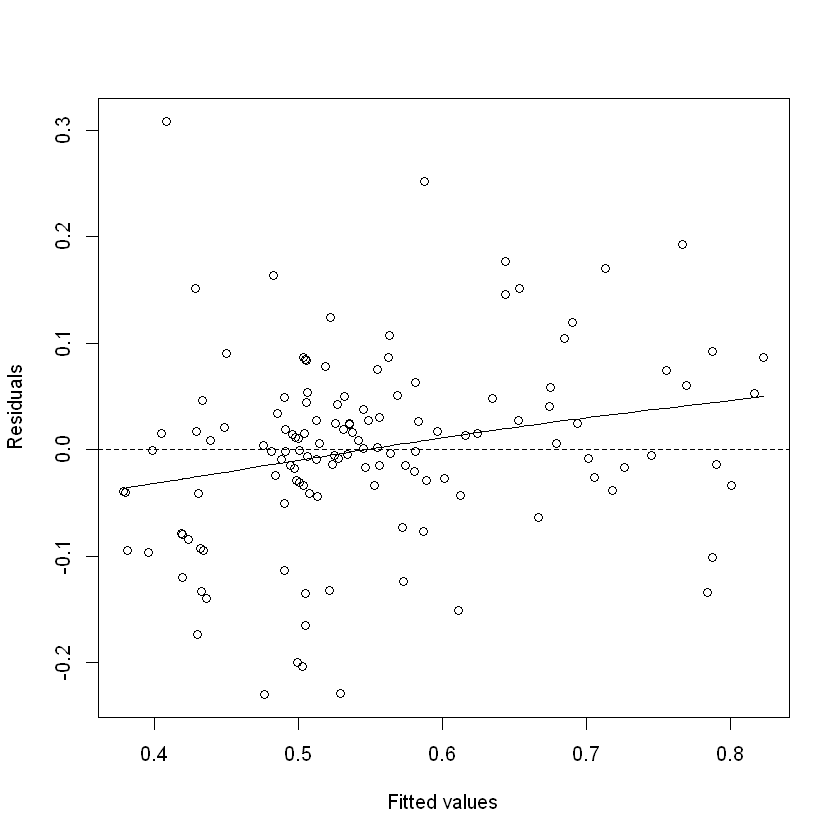

In [55]:
# Plot residuals and best best fit line to see how much they deviate. hard line over the dotted line would mean a perfect fit 
plot(fitted(rs_subj_tOut_ml), residuals(rs_subj_tOut_ml), xlab="Fitted values", ylab="Residuals")
abline(h=0, lty=2)
lines(smooth.spline(fitted(rs_subj_tOut_ml), residuals(rs_subj_tOut_ml)))

### Significant parameters in the final model considering also the subject id:
1. Sex
2. tOut
3. tInOp:tOut

In [35]:
summary(rs_subj_tOut_ml)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: clo ~ 1 + sex + tInOp + sex:tInOp + (1 | subjId)
   Data: data

     AIC      BIC   logLik deviance df.resid 
  -183.7   -166.3     97.9   -195.7      130 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.30783 -0.38746  0.00445  0.45116  3.09593 

Random effects:
 Groups   Name        Variance Std.Dev.
 subjId   (Intercept) 0.005687 0.07541 
 Residual             0.009916 0.09958 
Number of obs: 136, groups:  subjId, 47

Fixed effects:
               Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)     2.34328    0.33853 109.01567   6.922 3.22e-10 ***
sexmale        -1.61726    0.48501 121.15790  -3.335  0.00113 ** 
tInOp          -0.06501    0.01255 109.36854  -5.180 1.02e-06 ***
sexmale:tInOp   0.05684    0.01806 121.44036   3.146  0.00208 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:


### Problem C: The full data-set

In [5]:
HE_full <- read.table("clothingFull.csv", sep=",", header=TRUE, as.is=TRUE)

In [141]:
summary(HE_full)
head(HE_full)

       X              clo              tOut            tInOp      
 Min.   :  1.0   Min.   :0.2300   Min.   : 9.337   Min.   :22.29  
 1st Qu.:201.5   1st Qu.:0.4700   1st Qu.:18.067   1st Qu.:25.47  
 Median :402.0   Median :0.5400   Median :21.226   Median :26.85  
 Mean   :402.0   Mean   :0.5515   Mean   :21.548   Mean   :26.83  
 3rd Qu.:602.5   3rd Qu.:0.6400   3rd Qu.:24.790   3rd Qu.:28.04  
 Max.   :803.0   Max.   :0.9700   Max.   :36.234   Max.   :32.20  
     sex                subjId           day            obs.no     
 Length:803         Min.   : 11.0   Min.   :1.000   Min.   :1.000  
 Class :character   1st Qu.: 59.0   1st Qu.:1.000   1st Qu.:2.000  
 Mode  :character   Median : 99.0   Median :2.000   Median :3.000  
                    Mean   :101.2   Mean   :1.971   Mean   :3.471  
                    3rd Qu.:141.0   3rd Qu.:3.000   3rd Qu.:5.000  
                    Max.   :199.0   Max.   :4.000   Max.   :6.000  

X,clo,tOut,tInOp,sex,subjId,day,obs.no
1,0.71,17.26720,22.28525,female,11,1,1
2,0.71,20.70000,24.57230,female,11,1,2
3,0.71,20.54773,25.55077,female,11,1,3
4,0.71,21.90000,26.40069,female,11,1,4
5,0.71,21.52080,26.66522,female,11,1,5
6,0.71,20.99017,27.18361,female,11,1,6


#### Add parameters to mixed linear model in increaments to find which ones give significance to the fit. We will keep subjId and day as random intercets since this does not seem to be an independent parameter.

In [7]:
mlm_init = lmer(clo ~ tOut * (1 | subjId), REML = FALSE, data = HE_full)
drop1(mlm_init)

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
tOut,0.9606674,0.9606674,1,798.6211,110.7647,2.398416e-24


In [8]:
mlm_sex = lmer(clo ~ tOut * sex * (1 | subjId), REML = FALSE, data = HE_full)
anova(mlm_init, mlm_sex)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
mlm_init,4,-1376.296,-1357.543,692.1481,-1384.296,NA,NA,NA
mlm_sex,6,-1382.580,-1354.450,697.2899,-1394.580,10.28366,2,0.005846991


In [9]:
mlm_day = lmer(clo ~ tOut * sex * (1 | day) * (1 | subjId), REML = FALSE, data = HE_full)
anova(mlm_init, mlm_day)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
mlm_init,4,-1376.296,-1357.543,692.1481,-1384.296,NA,NA,NA
mlm_day,7,-1399.233,-1366.415,706.6165,-1413.233,28.93685,3,2.308903e-06


In [10]:
mlm_tInOp = lmer(clo ~ tOut * tInOp * (1 | day) * sex * (1 | subjId), REML = FALSE, data = HE_full)
anova(mlm_init, mlm_tInOp)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
mlm_init,4,-1376.296,-1357.543,692.1481,-1384.296,NA,NA,NA
mlm_tInOp,11,-1395.383,-1343.811,708.6914,-1417.383,33.0866,7,2.551083e-05


In [11]:
mlm_obsno = lmer(clo ~ tOut * tInOp * (1 | day) * sex * (1 | obs.no) * (1 | subjId), REML = FALSE, data = HE_full)
anova(mlm_init, mlm_obsno)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge with max|grad| = 0.0165499 (tol = 0.002, component 1)"

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
mlm_init,4,-1376.296,-1357.543,692.1481,-1384.296,NA,NA,NA
mlm_obsno,12,-1400.792,-1344.532,712.3962,-1424.792,40.49614,8,2.589096e-06


In [12]:
mlm_no_subjectId = lmer(clo ~ tInOp * tOut * (1 | day) * (1 | obs.no), REML = FALSE, data = HE_full)
anova(mlm_obsno, mlm_no_subjectId)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
mlm_no_subjectId,7,-868.7535,-835.935,441.3767,-882.7535,NA,NA,NA
mlm_obsno,12,-1400.7923,-1344.532,712.3962,-1424.7923,542.0388,5,6.699314e-115


In [13]:
mlm_no_day = lmer(clo ~ tInOp * tOut * (1 | obs.no) * (1 | subjId), REML = FALSE, data = HE_full)
anova(mlm_obsno, mlm_no_day)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
mlm_no_day,7,-1375.994,-1343.176,694.9972,-1389.994,NA,NA,NA
mlm_obsno,12,-1400.792,-1344.532,712.3962,-1424.792,34.79783,5,1.651099e-06


#### Subject id and day of the experiment are very important for the fit.

### Model validation

In [16]:
summary(mlm_no_subjectId)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: clo ~ tInOp * tOut * (1 | day) * (1 | obs.no)
   Data: HE_full

     AIC      BIC   logLik deviance df.resid 
  -868.8   -835.9    441.4   -882.8      796 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4428 -0.6312 -0.1044  0.4640  2.9329 

Random effects:
 Groups   Name        Variance  Std.Dev.
 obs.no   (Intercept) 1.328e-03 0.036445
 day      (Intercept) 7.253e-05 0.008517
 Residual             1.913e-02 0.138311
Number of obs: 803, groups:  obs.no, 6; day, 4

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)  1.996e+00  3.291e-01  7.891e+02   6.063 2.06e-09 ***
tInOp       -4.185e-02  1.233e-02  7.956e+02  -3.395  0.00072 ***
tOut        -4.585e-02  1.418e-02  8.021e+02  -3.235  0.00127 ** 
tInOp:tOut   1.144e-03  5.211e-04  8.027e+02   2.196  0.02836 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 

In [14]:
confint(mlm_no_subjectId)

Computing profile confidence intervals ...


,2.5 %,97.5 %
.sig01,0.0193504023,0.07757468
.sig02,0.0000000000,0.03718561
.sigma,0.1317766991,0.14540321
(Intercept),1.3363258743,2.65337873
tInOp,-0.0664797830,-0.01714400
tOut,-0.0738517598,-0.01781285
tInOp:tOut,0.0001132935,0.00217417


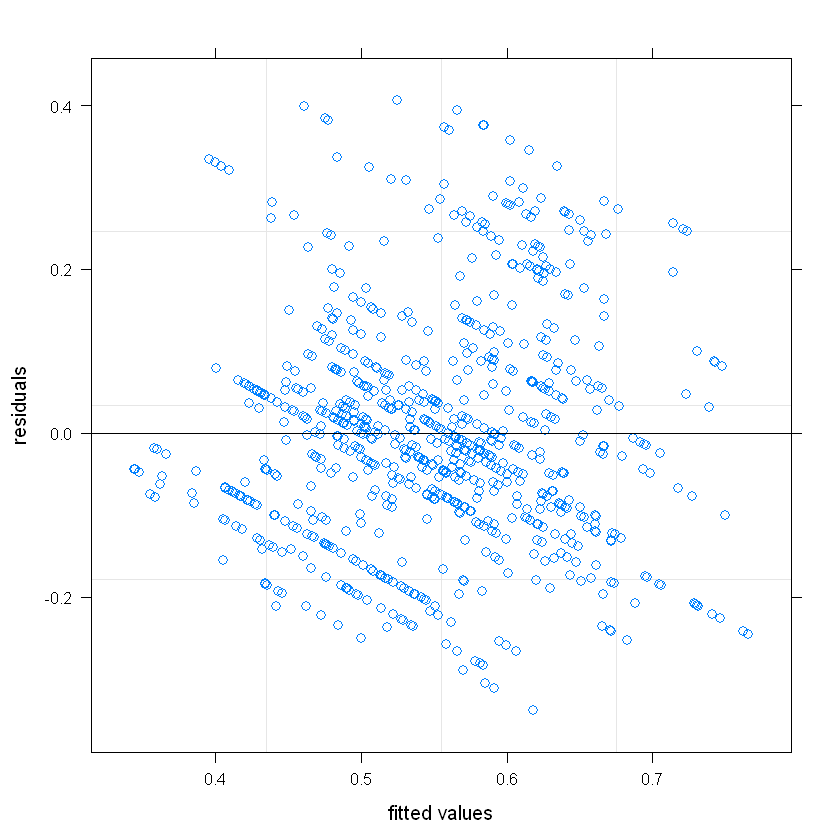

In [15]:
plot(mlm_no_subjectId, xlab="fitted values", ylab="residuals")

### Check the linear and log scale (for diminushing the effect of biased datapoints)

In [169]:
model0_full <- lm(clo ~ tInOp*tOut*subjId*day*obs.no, data = HE_full)
summary(model0_full)

par(mfrow=c(2,2))
plot(model1_update_1)


Call:
lm(formula = clo ~ tInOp * tOut * subjId * day * obs.no, data = HE_full)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35419 -0.08463 -0.00979  0.06697  0.41707 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)
(Intercept)                   4.288e-01  4.300e+00   0.100    0.921
tInOp                         1.488e-02  1.683e-01   0.088    0.930
tOut                          9.518e-02  2.163e-01   0.440    0.660
subjId                        1.566e-02  4.613e-02   0.340    0.734
day                           8.137e-01  2.145e+00   0.379    0.704
obs.no                       -1.083e-01  9.718e-01  -0.111    0.911
tInOp:tOut                   -4.462e-03  8.302e-03  -0.537    0.591
tInOp:subjId                 -6.910e-04  1.787e-03  -0.387    0.699
tOut:subjId                  -1.103e-03  2.250e-03  -0.490    0.624
tInOp:day                    -2.960e-02  8.375e-02  -0.353    0.724
tOut:day                     -7.252e-02  1.012e-01  -

ERROR: Error in plot(model1_update_1): object 'model1_update_1' not found


In [170]:
model1_full <- lm(log(clo) ~ tInOp*tOut*subjId*day*obs.no, data = HE_full)
summary(model1_full)

par(mfrow=c(2,2))
plot(model1_update_1)


Call:
lm(formula = log(clo) ~ tInOp * tOut * subjId * day * obs.no, 
    data = HE_full)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79034 -0.14761  0.00777  0.15016  0.70123 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)
(Intercept)                  -1.445e+00  7.868e+00  -0.184    0.854
tInOp                         5.580e-02  3.080e-01   0.181    0.856
tOut                          2.209e-01  3.957e-01   0.558    0.577
subjId                        1.779e-02  8.441e-02   0.211    0.833
day                           1.478e+00  3.925e+00   0.377    0.707
obs.no                       -4.387e-01  1.778e+00  -0.247    0.805
tInOp:tOut                   -1.029e-02  1.519e-02  -0.677    0.498
tInOp:subjId                 -8.573e-04  3.269e-03  -0.262    0.793
tOut:subjId                  -1.796e-03  4.118e-03  -0.436    0.663
tInOp:day                    -5.669e-02  1.532e-01  -0.370    0.712
tOut:day                     -1.342e-01  1.

ERROR: Error in plot(model1_update_1): object 'model1_update_1' not found


#### Remark: Residuals are identically, independent and normally distributed around mean 0 and variance sigma. Based on the QQ-plot, the residuals cover most of the variace in the model. By plotting the fitted value vs residuals, we notice the scaterred patern for residuals.

#### Perform the incremental model reduction
Reduce the parameters of the linear model by dropping parameters one by one. 

In [171]:
drop1(model0_full, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.36124,-3167.129,NA,NA
tInOp:tOut:subjId:day:obs.no,1,0.001723522,14.36296,-3169.032,0.0925293,0.7610681


In [173]:
model1_full = update(model0_full,~. -tInOp:tOut:subjId:day:obs.no)
drop1(model1_full, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.36296,-3169.032,NA,NA
tInOp:tOut:subjId:day,1,0.0200120942,14.38298,-3169.914,1.075637034,0.3000004
tInOp:tOut:subjId:obs.no,1,0.0133743197,14.37634,-3170.285,0.718860978,0.3967806
tInOp:tOut:day:obs.no,1,0.0001035876,14.36307,-3171.027,0.005567765,0.9405384
tInOp:subjId:day:obs.no,1,0.0001909641,14.36316,-3171.022,0.010264195,0.9193288
tOut:subjId:day:obs.no,1,0.0050748197,14.36804,-3170.749,0.272768257,0.6016306


In [174]:
model2_full = update(model1_full,~. -tInOp:tOut:day:obs.no)
drop1(model2_full, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.36307,-3171.027,NA,NA
tInOp:tOut:subjId:day,1,0.0201637537,14.38323,-3171.900,1.08518468,0.2978663
tInOp:tOut:subjId:obs.no,1,0.0134376376,14.37651,-3172.276,0.72319463,0.3953613
tInOp:subjId:day:obs.no,1,0.0002148471,14.36328,-3173.015,0.01156277,0.9143962
tOut:subjId:day:obs.no,1,0.0051066079,14.36817,-3172.741,0.27483041,0.6002600


In [175]:
model3_full = update(model2_full,~. -tInOp:subjId:day:obs.no)
drop1(model3_full, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.36328,-3173.015,NA,NA
tInOp:day:obs.no,1,0.073517943,14.43680,-3170.915,3.9616909,0.04689824
tInOp:tOut:subjId:day,1,0.020239314,14.38352,-3173.884,1.0906440,0.29665461
tInOp:tOut:subjId:obs.no,1,0.014939255,14.37822,-3174.180,0.8050376,0.36987045
tOut:subjId:day:obs.no,1,0.006604128,14.36989,-3174.646,0.3558793,0.55097815


In [176]:
model4_full = update(model3_full,~. -tOut:subjId:day:obs.no)
drop1(model4_full, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.36989,-3174.646,NA,NA
tInOp:day:obs.no,1,0.07967622,14.44956,-3172.205,4.2971157,0.038507034
tOut:day:obs.no,1,0.01304628,14.38293,-3175.917,0.7036151,0.401830288
subjId:day:obs.no,1,0.13366426,14.50355,-3169.211,7.2088110,0.007409699
tInOp:tOut:subjId:day,1,0.01363838,14.38353,-3175.884,0.7355482,0.391355828
tInOp:tOut:subjId:obs.no,1,0.01645588,14.38634,-3175.727,0.8875022,0.346448650


In [177]:
model5_full = update(model4_full,~. -tOut:day:obs.no)
drop1(model5_full, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.38293,-3175.917,NA,NA
tInOp:day:obs.no,1,0.06669930,14.44963,-3174.202,3.5986164,0.058198725
subjId:day:obs.no,1,0.15482589,14.53776,-3169.319,8.3532954,0.003957292
tInOp:tOut:subjId:day,1,0.01242413,14.39536,-3177.224,0.6703171,0.413192429
tInOp:tOut:subjId:obs.no,1,0.01674636,14.39968,-3176.982,0.9035133,0.342137348


In [178]:
model6_full = update(model5_full,~. -tInOp:tOut:subjId:day)
drop1(model6_full, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.39536,-3177.224,NA,NA
tInOp:tOut:day,1,0.02244652,14.41780,-3177.972,1.2115674,0.271362809
tInOp:subjId:day,1,0.01047235,14.40583,-3178.640,0.5652526,0.452379273
tOut:subjId:day,1,0.10417525,14.49953,-3173.433,5.6229357,0.017969855
tInOp:day:obs.no,1,0.07317655,14.46853,-3175.152,3.9497580,0.047228779
subjId:day:obs.no,1,0.15945907,14.55482,-3170.377,8.6069202,0.003447453
tInOp:tOut:subjId:obs.no,1,0.01696492,14.41232,-3178.278,0.9156939,0.338905793


In [179]:
model7_full = update(model6_full,~. -tInOp:subjId:day)
drop1(model7_full, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.40583,-3178.640,NA,NA
tInOp:tOut:day,1,0.02098924,14.42682,-3179.470,1.133543,0.287351192
tOut:subjId:day,1,0.17101015,14.57684,-3171.163,9.235559,0.002453059
tInOp:day:obs.no,1,0.06938993,14.47522,-3176.781,3.747467,0.053249577
subjId:day:obs.no,1,0.16109789,14.56693,-3171.710,8.700239,0.003277085
tInOp:tOut:subjId:obs.no,1,0.01853851,14.42437,-3179.607,1.001189,0.317334049


In [180]:
model8_full = update(model7_full,~. -tInOp:tOut:subjId:obs.no)
drop1(model8_full, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.42437,-3179.607,NA,NA
tInOp:tOut:subjId,1,0.015965972,14.44033,-3180.719,0.8622556,0.353395886
tInOp:tOut:day,1,0.022380747,14.44675,-3180.362,1.2086908,0.271931201
tOut:subjId:day,1,0.183171859,14.60754,-3171.474,9.8923483,0.001722714
tInOp:tOut:obs.no,1,0.002577157,14.42695,-3181.463,0.1391815,0.709197570
tInOp:subjId:obs.no,1,0.002703314,14.42707,-3181.456,0.1459947,0.702496930
tOut:subjId:obs.no,1,0.025191347,14.44956,-3180.206,1.3604796,0.243811336
tInOp:day:obs.no,1,0.075165645,14.49953,-3177.433,4.0593831,0.044269683
subjId:day:obs.no,1,0.161055372,14.58542,-3172.691,8.6979291,0.003281070


In [181]:
model9_full = update(model8_full,~. -tInOp:tOut:obs.no)
drop1(model9_full, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.42695,-3181.463,NA,NA
tInOp:tOut:subjId,1,0.015185347,14.44213,-3182.619,0.8210033,0.365166783
tInOp:tOut:day,1,0.020923639,14.44787,-3182.300,1.1312470,0.287838671
tOut:subjId:day,1,0.182463811,14.60941,-3173.371,9.8649968,0.001748102
tInOp:subjId:obs.no,1,0.003099646,14.43005,-3183.291,0.1675839,0.682380424
tOut:subjId:obs.no,1,0.024747564,14.45169,-3182.087,1.3379894,0.247742988
tInOp:day:obs.no,1,0.072589063,14.49953,-3179.433,3.9245638,0.047936349
subjId:day:obs.no,1,0.164783564,14.59173,-3174.344,8.9091054,0.002926174


In [182]:
model10_full = update(model9_full,~. -tInOp:subjId:obs.no)
drop1(model10_full, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.43005,-3183.291,NA,NA
tInOp:tOut:subjId,1,0.01858128,14.44863,-3184.258,1.005678,0.316251117
tInOp:tOut:day,1,0.02193796,14.45198,-3184.071,1.187352,0.276200334
tOut:subjId:day,1,0.18516794,14.61521,-3175.052,10.021878,0.001606960
tOut:subjId:obs.no,1,0.02171609,14.45176,-3184.083,1.175344,0.278640495
tInOp:day:obs.no,1,0.07109299,14.50114,-3181.344,3.847779,0.050166776
subjId:day:obs.no,1,0.16394063,14.59399,-3176.219,8.872989,0.002983841


In [183]:
model11_full = update(model10_full,~. -tInOp:tOut:subjId)
drop1(model11_full, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.44863,-3184.258,NA,NA
tInOp:subjId,1,0.250717031,14.69934,-3172.443,13.5695055,0.0002457213
tInOp:tOut:day,1,0.024880513,14.47351,-3184.876,1.3466028,0.2462270358
tOut:subjId:day,1,0.182934963,14.63156,-3176.155,9.9009508,0.0017145381
tOut:subjId:obs.no,1,0.006698074,14.45532,-3185.885,0.3625185,0.5472853839
tInOp:day:obs.no,1,0.070377338,14.51900,-3182.356,3.8090180,0.0513339621
subjId:day:obs.no,1,0.159116155,14.60774,-3177.463,8.6118104,0.0034376774


In [184]:
model12_full = update(model11_full,~. -tOut:subjId:obs.no)
drop1(model12_full, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.45532,-3185.885,NA,NA
tInOp:subjId,1,0.24718275,14.70251,-3174.270,13.389121,0.0002700512
tOut:obs.no,1,0.02185002,14.47717,-3186.673,1.183548,0.2769697079
tInOp:tOut:day,1,0.02509096,14.48042,-3186.493,1.359099,0.2440486499
tOut:subjId:day,1,0.18601852,14.64134,-3177.618,10.076045,0.0015608363
tInOp:day:obs.no,1,0.07263165,14.52796,-3183.861,3.934231,0.0476616795
subjId:day:obs.no,1,0.15314636,14.60847,-3179.423,8.295462,0.0040829215


In [185]:
model13_full = update(model12_full,~. -tOut:obs.no)
drop1(model13_full, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.47717,-3186.673,NA,NA
tInOp:subjId,1,0.23307838,14.71025,-3175.847,12.622176,0.0004039843
tInOp:tOut:day,1,0.02327086,14.50045,-3187.383,1.260215,0.2619540314
tOut:subjId:day,1,0.18481550,14.66199,-3178.486,10.008538,0.0016182590
tInOp:day:obs.no,1,0.06321901,14.54039,-3185.174,3.423576,0.0646477196
subjId:day:obs.no,1,0.15038347,14.62756,-3180.374,8.143899,0.0044345179


In [186]:
model14_full = update(model13_full,~. -tInOp:tOut:day)
drop1(model14_full, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.50045,-3187.383,NA,NA
tInOp:tOut,1,0.07836807,14.57881,-3185.055,4.242555,0.0397520016
tInOp:subjId,1,0.21527964,14.71573,-3177.549,11.654436,0.0006733469
tOut:subjId:day,1,0.18069241,14.68114,-3179.438,9.782013,0.0018273198
tInOp:day:obs.no,1,0.04389707,14.54434,-3186.956,2.376424,0.1235822565
subjId:day:obs.no,1,0.15003033,14.65048,-3181.117,8.122082,0.0044874882


In [187]:
model15_full = update(model14_full,~. -tInOp:day:obs.no)
drop1(model15_full, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.54434,-3186.956,NA,NA
tInOp:tOut,1,0.08578666,14.63013,-3184.233,4.636051,0.0316105603
tInOp:subjId,1,0.20809599,14.75244,-3177.548,11.245847,0.0008362217
tInOp:day,1,0.02202936,14.56637,-3187.740,1.190503,0.2755625533
tInOp:obs.no,1,0.10439265,14.64874,-3183.213,5.641549,0.0177786842
tOut:subjId:day,1,0.18000982,14.72435,-3179.078,9.728025,0.0018810083
subjId:day:obs.no,1,0.13836637,14.68271,-3181.352,7.477544,0.0063879608


In [188]:
model16_full = update(model15_full,~. -tInOp:day)
drop1(model16_full, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,14.56637,-3187.740,NA,NA
tInOp:tOut,1,0.1007059,14.66708,-3184.208,5.440992,0.0199207303
tInOp:subjId,1,0.2121203,14.77849,-3178.131,11.460555,0.0007461207
tInOp:obs.no,1,0.1083955,14.67477,-3183.787,5.856453,0.0157455717
tOut:subjId:day,1,0.1984599,14.76483,-3178.874,10.722502,0.0011046691
subjId:day:obs.no,1,0.1381609,14.70453,-3182.160,7.464636,0.0064333028


Now after 15 incremental reductions all parameters are significant and we should have now a model that describes our data pretty well


Call:
lm(formula = clo ~ tInOp + tOut + subjId + day + obs.no + tInOp:tOut + 
    tInOp:subjId + tOut:subjId + tOut:day + subjId:day + tInOp:obs.no + 
    subjId:obs.no + day:obs.no + tOut:subjId:day + subjId:day:obs.no, 
    data = HE_full)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34828 -0.09109 -0.01112  0.06561  0.40987 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.187e+00  3.649e-01   5.994 3.11e-09 ***
tInOp             -5.121e-02  1.406e-02  -3.641 0.000289 ***
tOut              -5.696e-02  1.738e-02  -3.277 0.001097 ** 
subjId            -7.576e-03  1.895e-03  -3.997 7.03e-05 ***
day               -5.419e-02  6.053e-02  -0.895 0.370952    
obs.no             1.734e-01  4.893e-02   3.543 0.000419 ***
tInOp:tOut         1.324e-03  5.677e-04   2.333 0.019921 *  
tInOp:subjId       2.452e-04  7.243e-05   3.385 0.000746 ***
tOut:subjId        1.301e-04  5.958e-05   2.184 0.029261 *  
tOut:day           5.615e-03

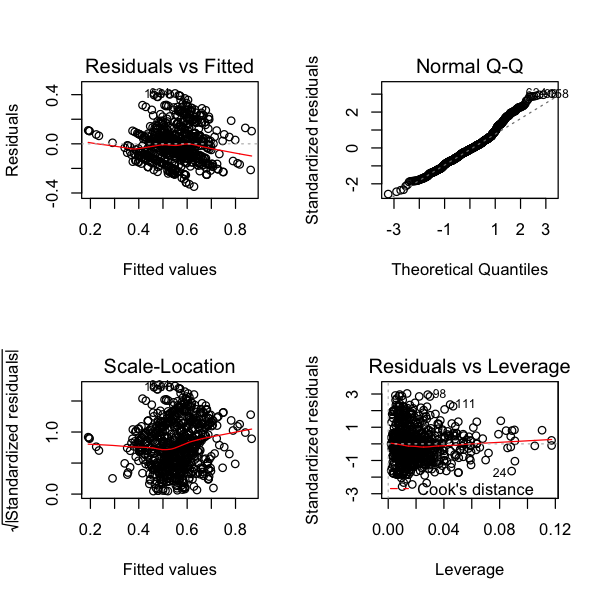

In [190]:
summary(model16_full)

par(mfrow=c(2,2))
plot(model16_full)

Residuals are independent, identically and normaly distributed, having mean around 0 and variance sigma^2.